<a href="https://colab.research.google.com/github/tiagopessoalima/TATI/blob/main/Semana_05_(TATI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Visualização de Dados**

Utilizaremos a visualização de dados para extrair *insights* sobre os preços das casas e suas características. Empregaremos diversos gráficos estatísticos, construídos com [Matplotlib](https://matplotlib.org/) e [Seaborn](https://seaborn.pydata.org/), para analisar as distribuições das variáveis, identificar as relações entre elas e mapear padrões geográficos, culminando em um storytelling com dados que nos permitirá compreender as dinâmicas deste mercado.

## **Importar bibliotecas**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## **Configuração dos gráficos**

Antes de plotar, configuramos o estilo e a paleta do Seaborn para definir fundo, grade e cores dos gráficos.

### **Estilo**

O parâmetro `style` em `sns.set_theme()` define o fundo e a grade dos gráficos, influenciando a aparência visual das visualizações.

In [ ]:
sns.set_theme(style="whitegrid") # aplica um fundo branco com linhas de grade claras aos gráficos.

Além do estilo `whitegrid`, você pode usar:

* `darkgrid`: fundo escuro com grade branca, ideal para telas escuras.
* `white`: fundo branco sem grade, visual limpo e minimalista.
* `dark`: fundo escuro sem grade, bom para destacar dados claros.
* `ticks`: com marcações nos eixos, estilo clássico para gráficos técnicos.

### **Paleta**

O parâmetro `palette` em `sns.set_theme()` define as cores usadas nos gráficos, influenciando a estética e a distinção entre categorias.

In [ ]:
sns.set_palette("husl") # oferece um conjunto de cores distintas e com brilho e saturação equilibrados.

Além da paleta `deep`, você pode usar:

* `muted`: cores suaves e discretas, ideais para relatórios formais.
* `bright`: cores vivas e saturadas, boas para destacar categorias.
* `pastel`: tons claros e suaves, com visual leve.
* `dark`: cores escuras e intensas, com forte contraste.
* `colorblind`: otimizada para acessibilidade, diferenciável por pessoas com daltonismo.


## **Carregamento dos Dados**


### **Baixar e Extrair o Arquivo**


In [ ]:
import tarfile
from urllib.request import urlretrieve
from pathlib import Path

URL = "https://raw.githubusercontent.com/tiagopessoalima/TATI/main/datasets/housing_semana_03.tgz"
DIR = Path("datasets/housing")
TGZ = DIR / "housing.tgz"
CSV = DIR / "housing.csv"

def baixar():
    DIR.mkdir(parents=True, exist_ok=True)
    if not TGZ.is_file():
        urlretrieve(URL, TGZ)

def extrair():
    if TGZ.is_file() and not CSV.is_file():
        with tarfile.open(TGZ) as f:
            f.extractall(path=DIR)

baixar()
extrair()

### **Carregamento do CSV**

In [ ]:
import pandas as pd

df = pd.read_csv(DIR / 'housing_semana_03.csv')

## **Visualizações Básicas**


Vamos começar com algumas visualizações univariadas para entender a distribuição de variáveis chave.

> Visualizações que envolvem mais de uma variável são chamadas de:
>* **Bivariadas**: analisam a relação entre duas variáveis.
* **Multivariadas**: exploram três ou mais variáveis simultaneamente.

### **Histograma do Valor Mediano das Casas**


O histograma representa a distribuição de uma variável contínua, agrupando os valores em intervalos (*bins*) e contabilizando a frequência em cada intervalo. Neste caso, exibe a frequência dos valores medianos das casas na amostra.

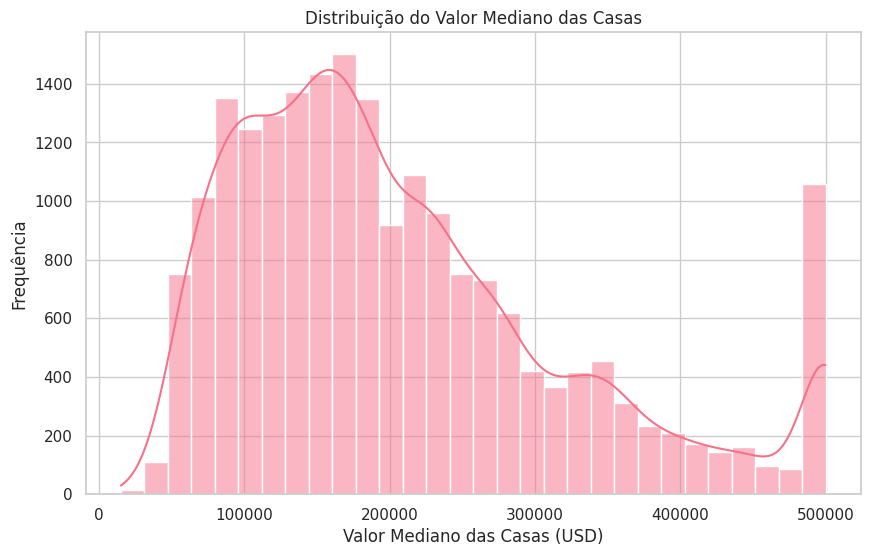

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['valor_mediano_casas'], bins=30, kde=True)
plt.title('Distribuição do Valor Mediano das Casas')
plt.xlabel('Valor Mediano das Casas (USD)')
plt.ylabel('Frequência')
plt.savefig('images/hist_valor_mediano_casas.png')
plt.show()

Este histograma com curva de densidade ilustra a distribuição do valor mediano das casas na Califórnia, evidenciando que **a maioria dos imóveis se concentra em faixas de preço abaixo de 300.000 USD, com um pico de frequência entre 150.000 e 200.000 USD.** A distribuição é assimétrica à direita, indicando menos casas em valores mais altos, mas um ponto crítico é o acúmulo significativo de dados no limite de 500.000 USD, um efeito de "*capping*" comum nesses conjuntos de dados que mascara a real extensão dos preços elevados.

### ***Box Plot* da Renda Mediana**

Também conhecido como diagrama de caixa ou box e *whisker plot*, é uma representação gráfica que descreve a distribuição de uma variável numérica, neste caso, a "Renda Mediana". Ele é particularmente útil para visualizar a tendência central, a dispersão (ou variabilidade) e a assimetria dos dados, além de identificar a presença de valores discrepantes (*outliers*).

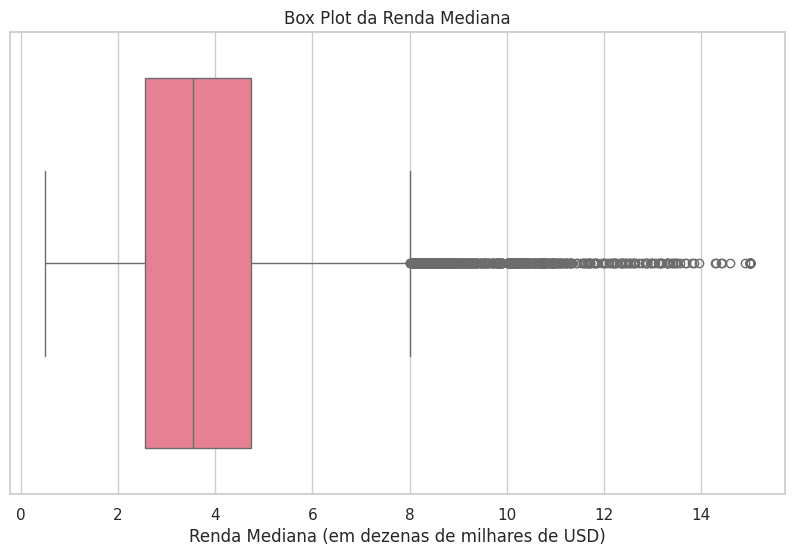

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['renda_mediana'])
plt.title('Box Plot da Renda Mediana')
plt.xlabel('Renda Mediana (em dezenas de milhares de USD)')
plt.savefig('images/box_renda_mediana.png')
plt.show()

O Box Plot é composto por alguns elementos chave:

1.  **Caixa (Box):** Representa o intervalo interquartil (IQR), que contém 50% dos dados centrais da amostra.
    * **linha inferior** marca o primeiro quartil (Q1), ou seja, 25% dos dados de renda mediana são menores ou iguais a este valor.
    * **linha superior** marca o terceiro quartil (Q3), indicando que 75% dos dados de renda mediana são menores ou iguais a este valor.

2.  **Linha da Mediana (Q2):** Uma linha dentro da caixa que representa a mediana (ou segundo quartil) da renda mediana. Este é o valor central que divide os dados em duas metades iguais: 50% das rendas medianas estão abaixo deste valor e 50% estão acima. A posição desta linha dentro da caixa também pode dar uma indicação da assimetria da distribuição.

3.  **"Bigodes" (*Whiskers*):** São as linhas que se estendem a partir da caixa para cima e para baixo. Eles mostram o alcance da maior parte dos dados, excluindo os *outliers*. Comumente, os limites dos bigodes são definidos como $Q1 - 1.5 \times IQR$ para o bigode inferior e $Q3 + 1.5 \times IQR$ para o bigode superior (ou até o último ponto de dado dentro desse limite, caso não haja pontos tão extremos).

4.  ***Outliers*:** São pontos individuais plotados além dos bigodes. Eles representam valores de renda mediana que são atipicamente altos ou baixos em comparação com o restante da distribuição.

Em resumo, o box plot revela que **a renda mediana na amostra é predominantemente concentrada em faixas mais baixas a moderadas, com uma mediana em torno de 35.000 USD**, mas com uma notável presença de áreas com rendas significativamente mais altas, indicando uma distribuição assimétrica à direita e uma considerável disparidade de renda.

### **Gráfico de Dispersão: Renda Mediana vs. Valor Mediano das Casas**


O gráfico de dispersão (*scatter plot*) é uma ferramenta de visualização bivariada que mostra a relação entre duas variáveis numéricas. Cada ponto no gráfico representa uma observação, com a coordenada no eixo X correspondendo a uma variável e no eixo Y a outra. Esse gráfico é utilizado para identificar padrões, tendências e correlações entre as variáveis. Ao aplicá-lo à 'Renda Mediana' e ao 'Valor Mediano das Casas', transformamos cada distrito em um ponto no gráfico, onde sua posição horizontal reflete a renda mediana de seus habitantes e a posição vertical, o valor mediano de suas residências.

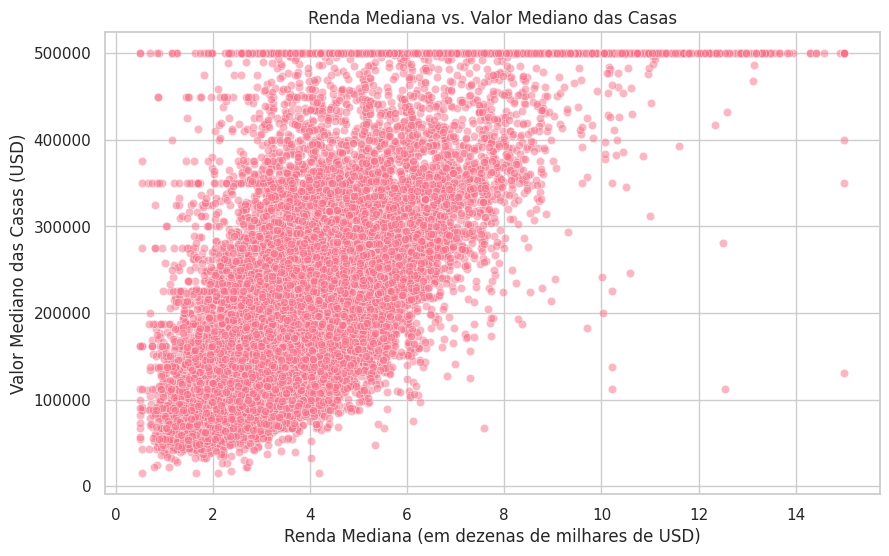

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='renda_mediana', y='valor_mediano_casas', data=df, alpha=0.5)
plt.title('Renda Mediana vs. Valor Mediano das Casas')
plt.xlabel('Renda Mediana (em dezenas de milhares de USD)')
plt.ylabel('Valor Mediano das Casas (USD)')
plt.savefig('images/scatter_renda_vs_valor.png')
plt.show()

Este gráfico revela uma clara correlação positiva entre a renda mediana dos distritos (eixo X) e o valor mediano de suas casas (eixo Y), indicando que, em geral, rendas mais altas estão associadas a casas mais caras. No entanto, a visualização também destaca uma crescente dispersão nos preços das casas à medida que a renda aumenta e, crucialmente, um forte efeito de "teto" (*capping*) em 500.000 USD para o valor das casas, onde uma grande quantidade de pontos se acumula. Isso sugere que, embora a renda seja um indicador importante, a verdadeira extensão dos preços mais altos é mascarada por essa limitação dos dados, e outros fatores também influenciam a dinâmica de preços no mercado imobiliário representado

### **Visualização de Dados Categóricos**

Embora a abordagem para visualizar dados categóricos seja diferente daquela para dados contínuos – por exemplo, não calculamos médias de categorias da mesma forma que fazemos com números –, existe um arsenal de técnicas gráficas projetadas especificamente para eles.

### **Gráfico de Barras: Contagem de Casas por Proximidade ao Oceano**

Um gráfico de barras é uma representação visual que utiliza barras de alturas (ou comprimentos) proporcionais para comparar valores entre diferentes categorias. No contexto de uma **"Contagem de Casas por Proximidade ao Oceano"**, cada barra do gráfico representaria uma categoria específica de localização, e a altura de cada barra indicaria o número total de casas encontradas naquela respectiva zona. Isso permitiria uma visualização clara e direta de quantas casas existem em cada tipo de localidade em relação ao oceano, facilitando a identificação das áreas com maior ou menor concentração de moradias dentro do conjunto de dados.

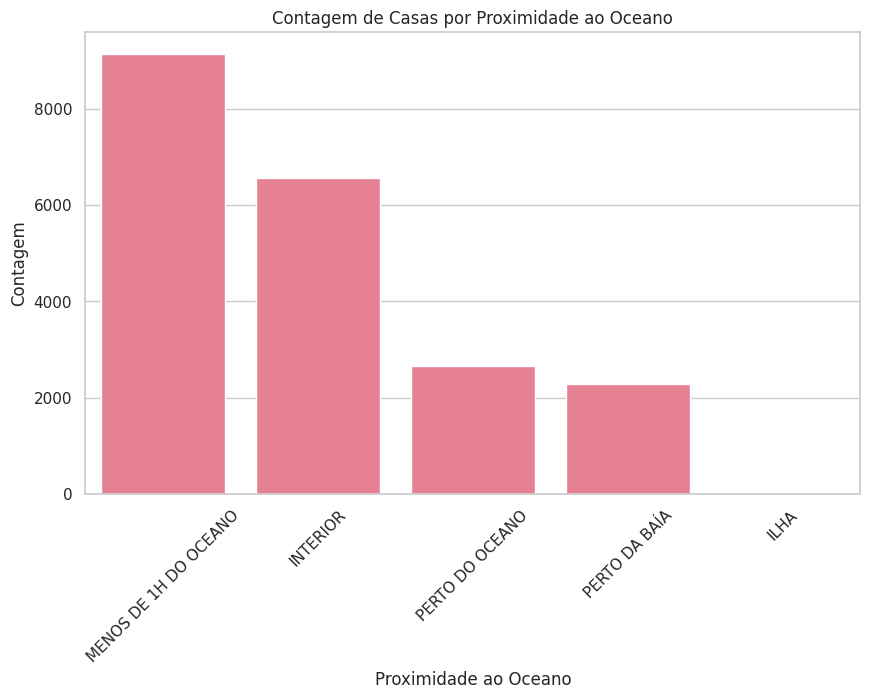

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='proximidade_ao_oceano', data=df, order = df['proximidade_ao_oceano'].value_counts().index) # Ordena as barras pela frequência
plt.title('Contagem de Casas por Proximidade ao Oceano')
plt.xlabel('Proximidade ao Oceano')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.savefig('images/bar_proximidade_oceano.png')
plt.show()

Este gráfico demonstra a distribuição da contagem de casas com base na sua proximidade ao oceano, evidenciando que a categoria "MENOS DE 1H DO OCEANO" possui, de longe, o maior número de moradias (aproximadamente 9.100), seguida pela categoria "INTERIOR" (cerca de 6.500 casas). As localizações "PERTO DO OCEANO" e "PERTO DA BAIA" apresentam contagens significativamente menores, ambas na faixa de 2.000 a 3.000 casas, enquanto a categoria "ILHA" é quase insignificante. Assim, o gráfico revela um padrão claro onde a maioria das residências no conjunto de dados está situada a menos de uma hora da costa ou no interior, com uma representação muito menor nas proximidades imediatas do oceano/baía e quase nenhuma em ilhas.

## **Visualizações Geográficas**


Embora a contagem indique quantas casas se enquadram em cada zona de proximidade ao oceano, ela não mostra onde exatamente essas zonas estão localizadas no mapa, nem como as casas dentro de cada uma dessas categorias estão espacialmente dispostas.

### **Gráfico de Dispersão Geográfico**


Para aprofundar a análise e visualizar como esses números se manifestam fisicamente, é necessário adotar uma abordagem espacial. Utilizando as colunas de latitude e longitude, podemos mapear a distribuição geográfica das moradias, permitindo identificar padrões regionais, como a localização precisa das áreas "PERTO DO OCEANO" e a abrangência das zonas "INTERIOR".

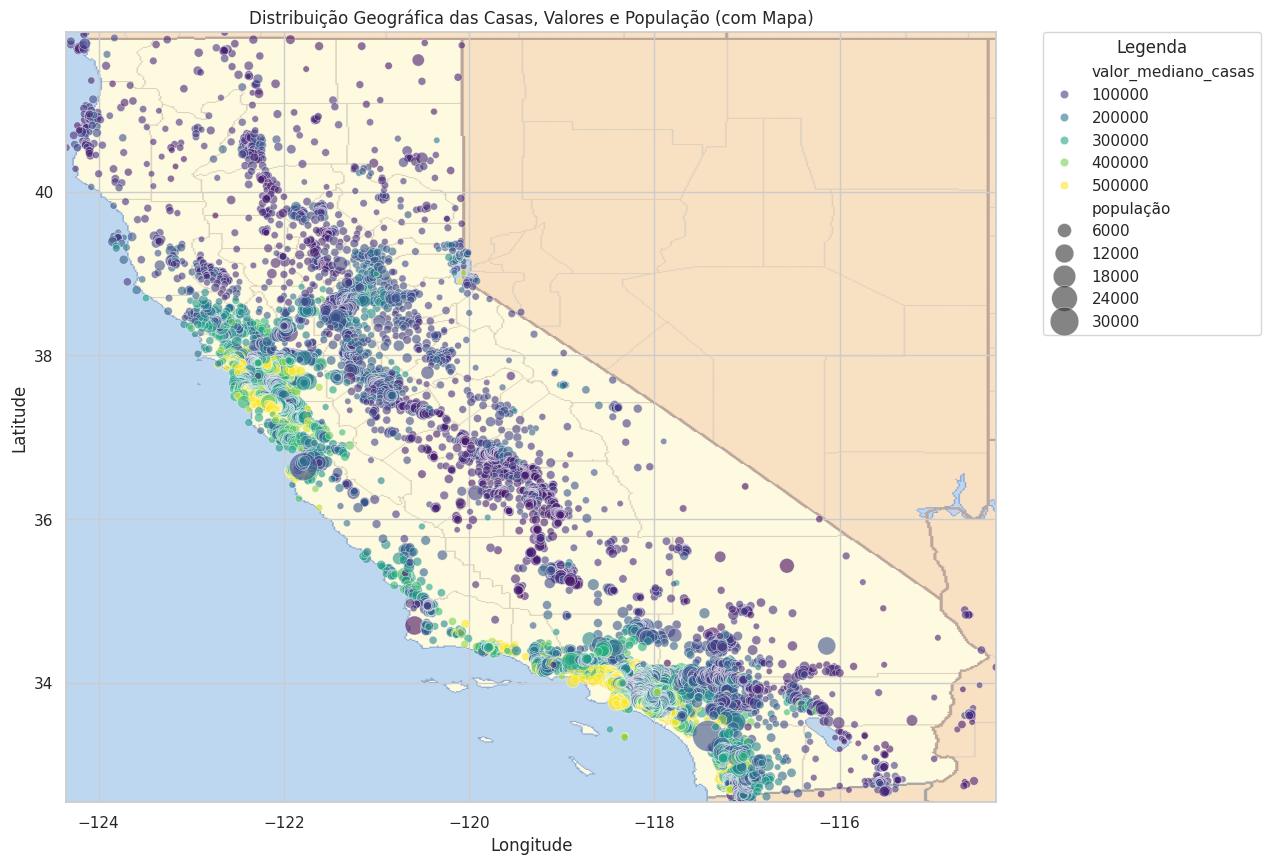

In [ ]:
import urllib.request
import os
import matplotlib.image as mpimg

os.makedirs("images", exist_ok=True)
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/images/end_to_end_project/california.png"
caminho_mapa = os.path.join("images", "california.png")

if not os.path.exists(caminho_mapa):
    urllib.request.urlretrieve(url, caminho_mapa)

try:
    mapa_img = mpimg.imread(caminho_mapa)
except FileNotFoundError:
    mapa_img = None

if mapa_img is not None:
    plt.figure(figsize=(12, 10))

    map_extent = [df['longitude'].min(),
                  df['longitude'].max(),
                  df['latitude'].min(),
                  df['latitude'].max()]

    plt.imshow(mapa_img, extent=map_extent, aspect='auto', alpha=0.7, zorder=0)

    sns.scatterplot(
        x='longitude',
        y='latitude',
        hue='valor_mediano_casas',
        size='população',
        data=df,
        alpha=0.6,
        palette='viridis',
        sizes=(20, 500),
        zorder=1
    )

    plt.title('Distribuição Geográfica das Casas, Valores e População (com Mapa)')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.xlim(map_extent[0], map_extent[1])
    plt.ylim(map_extent[2], map_extent[3])
    plt.legend(title='Legenda', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.savefig('images/geo_scatter_com_mapa.png', bbox_inches='tight')
    plt.show()

O mapa exibe as casas por localização, com cor indicando seu valor e tamanho, sua população, destacando alta concentração e valor nas metrópoles costeiras, em contraste com o interior, geralmente mais barato. Este mapa enriquece a análise do gráfico de barras anterior (que apenas contava casas por proximidade ao oceano), ao mostrar a exata disposição espacial, a densidade populacional e os valores reais dentro daquelas categorias, fornecendo um contexto visual e de valor que as simples contagens não ofereciam.

## **Gráfico de Violino: Valor Mediano das Casas vs. Proximidade ao Oceano**

Embora o gráfico geográfico revele a localização das moradias e padrões regionais de valor e densidade, ele não mostra como os valores medianos das casas se distribuem em cada zona de proximidade ao oceano. O gráfico de violino complementa essa análise ao exibir a distribuição, dispersão e densidade desses valores por categoria. O gráfico de violino é uma visualização estatística que combina elementos do boxplot com uma estimativa de densidade de probabilidade. Ele mostra, para cada categoria de uma variável, como os valores da outra variável (geralmente numérica) estão distribuídos. Componentes principais:

* **Forma do violino:** representa a densidade da distribuição dos dados. Regiões mais largas revelam concentração de valores.

* **Linha central:** mostra a mediana.

* **Caixa interna:** representa o intervalo interquartil (do 1º ao 3º quartil), como em um boxplot.

* **Extensões superiores e inferiores:** indicam os valores mínimo e máximo (ou os limites definidos para outliers).

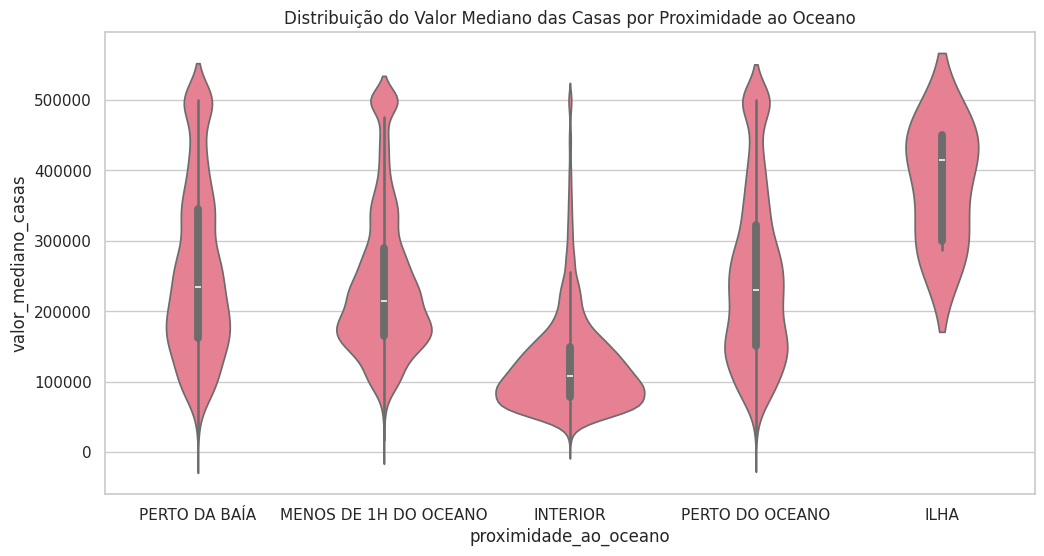

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='proximidade_ao_oceano', y='valor_mediano_casas', data=df)
plt.title('Distribuição do Valor Mediano das Casas por Proximidade ao Oceano')
plt.savefig('images/vio_valor_mediano_por_proximidade.png', bbox_inches='tight')
plt.show()

Este gráfico ilustra a distribuição do valor mediano das casas em relação à sua proximidade ao oceano, onde a largura de cada "violino" indica a concentração de imóveis em determinada faixa de preço. A análise revela uma forte tendência: imóveis em `ILHA` apresentam os valores medianos mais elevados, seguidos por aqueles `PERTO DO OCEANO` e `PERTO DA BAÍA`, enquanto propriedades no `INTERIOR` registram os valores mais baixos, demonstrando que a proximidade da água é um fator significativo na valorização imobiliária na Califórnia.

## **Análise de Correlação**


O gráfico de correlação é uma representação visual da matriz de correlação entre variáveis numéricas. Ele mostra como cada par de variáveis está relacionado, geralmente utilizando uma escala de cores (*heatmap*) para indicar a força e a direção da correlação:

* Valores próximos de **+1** indicam correlação positiva forte (quando uma variável aumenta, a outra tende a aumentar).
* Valores próximos de **-1** indicam correlação negativa forte (quando uma aumenta, a outra tende a diminuir).
* Valores próximos de **0** sugerem pouca ou nenhuma correlação linear.

É útil para identificar relações lineares entre variáveis, o que pode orientar a seleção de features ou ajudar a evitar multicolinearidade.

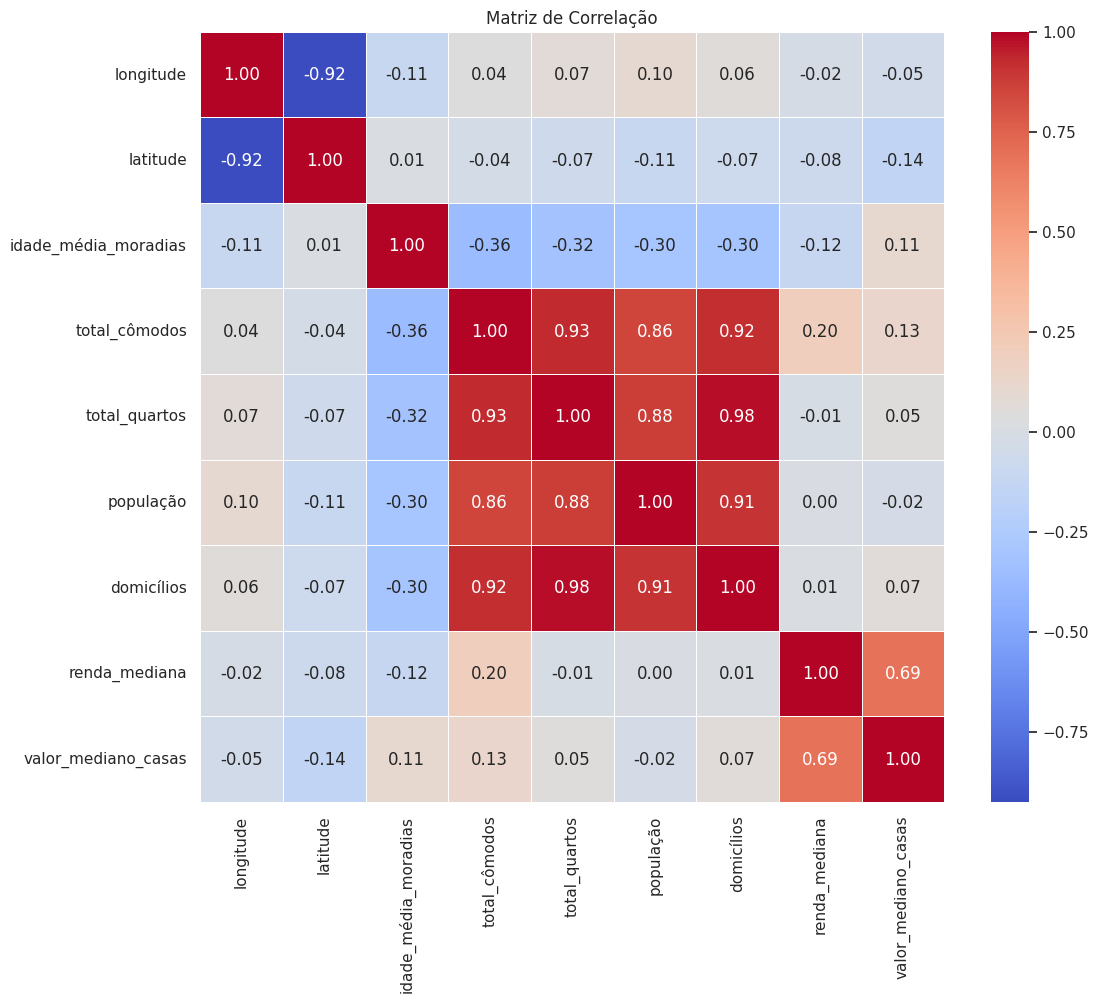

In [ ]:
correlation_matrix = df.drop('proximidade_ao_oceano', axis=1).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlação')
plt.savefig('images/heatmap_correlation.png')
plt.show()

**Correlação** mostra como variáveis se movem:
* **positiva** (juntas na mesma direção, ex: `renda_mediana` e `valor_mediano_casas` na sua matriz com 0.69)
* **fraca/nula** (sem relação linear clara, ex: `longitude` e `total_cômodos` com 0.04)
* **negativa** (em direções opostas, ex: `latitude` e `longitude` com -0.92)

> Importante: correlação não é causalidade. Um estudo de Tyler Vigan mostrou uma correlação de 0,66 entre o número de filmes lançados por [Nicolas Cage e afogamentos em piscinas](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Inferential_Statistics_and_Probability_-_A_Holistic_Approach_(Geraghty)/03%3A_Descriptive_Statistics/3.06%3A_Bivariate_Data/3.6.03%3A_Correlation_vs._Causation) no mesmo ano. A correlação é moderada, mas não implica causalidade, ou seja, não há uma relação de causa e efeito entre os dois eventos.


A **multicolinearidade** ocorre quando variáveis preditoras estão altamente correlacionadas entre si (ex: `total_cômodos` e `total_quartos` com 0,93), o que dificulta a distinção dos efeitos individuais de cada variável e pode levar a resultados instáveis ou imprecisos no modelo.


## **Visualizações Avançadas**


O pair plot é uma ótima ferramenta para visualizar as relações par a par entre múltiplas variáveis simultaneamente.

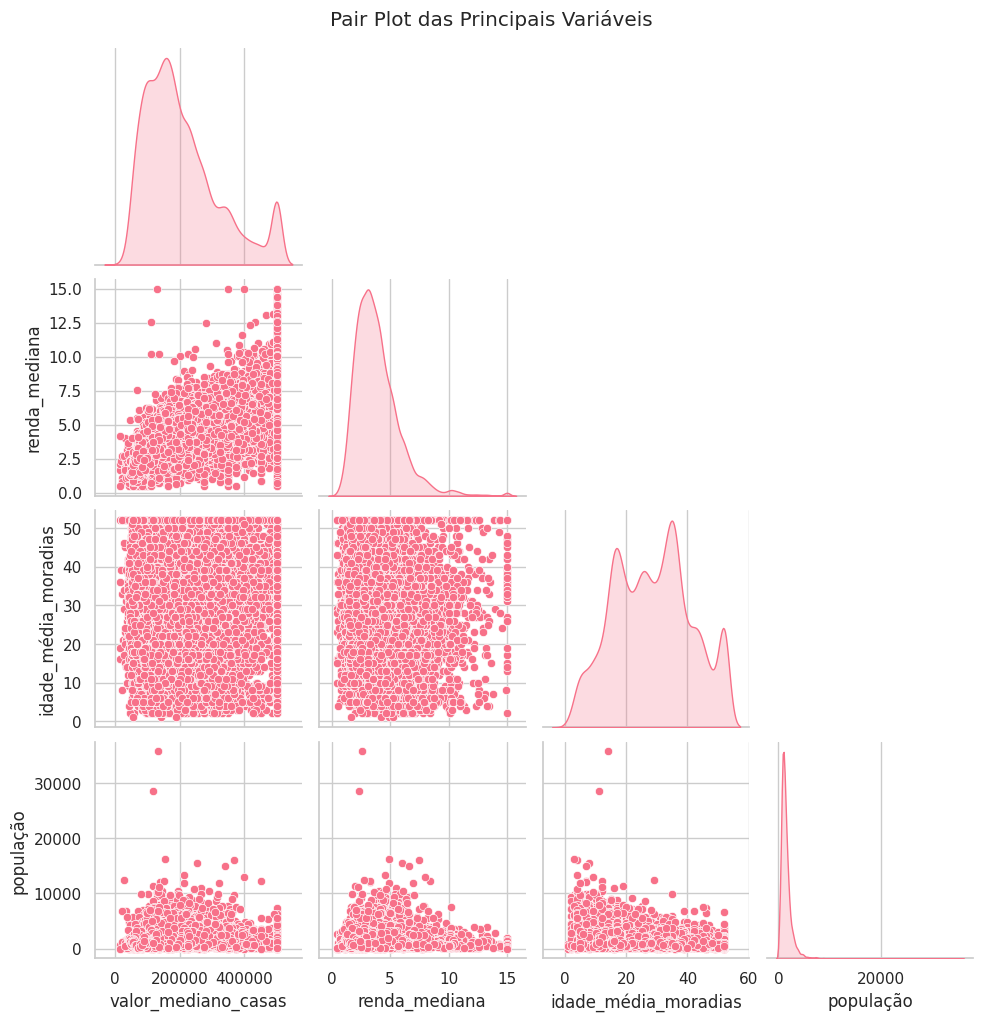

In [ ]:
cols = ['valor_mediano_casas', 'renda_mediana', 'idade_média_moradias', 'população']
sns.pairplot(df[cols], diag_kind='kde', corner=True)
plt.suptitle('Pair Plot das Principais Variáveis', y=1.02)
plt.savefig('images/pairplot.png')
plt.show()

Este pair plot resume as inter-relações e distribuições individuais de quatro variáveis chave: valor mediano das casas, renda mediana, idade média das moradias e população. Na diagonal, as curvas de densidade (KDEs) mostram que o valor das casas, a renda e a população são fortemente assimétricas à direita – com o valor das casas exibindo um "teto" artificial em 500 mil USD –, enquanto a idade das moradias tem uma distribuição mais espalhada e multimodal. Nos gráficos de dispersão fora da diagonal, a relação mais proeminente é a correlação positiva clara entre a renda mediana e o valor mediano das casas, ao passo que as outras combinações de variáveis não apresentam correlações lineares tão fortes, sugerindo interações mais complexas ou relações mais fracas entre elas.

## **Interatividade com Plotly**

A iteratividade oferece uma forma poderosa de explorar e analisar gráficos, proporcionando uma experiência mais envolvente e permitindo uma análise mais aprofundada. Embora o Matplotlib, a biblioteca subjacente do pyplot, seja amplamente utilizado para criar gráficos estáticos, ele também oferece algumas capacidades de interação, que podem ser extremamente úteis em determinados contextos. A interação em Matplotlib pode ser alcançada por meio de recursos como zoom, rotação, e interação com os dados diretamente no gráfico.

In [ ]:
import plotly.express as px

# Criando o gráfico interativo
fig = px.histogram(
    df,
    x='valor_mediano_casas',
    nbins=30,
    histnorm='probability density',  # Normaliza o histograma
    title='Distribuição do Valor Mediano das Casas',
    labels={'valor_mediano_casas': 'Valor Mediano das Casas (USD)'},
    opacity=0.7
)

# Exibindo o gráfico interativo
fig.update_layout(
    xaxis_title='Valor Mediano das Casas (USD)',
    yaxis_title='Frequência',
    bargap=0.1  # Controle do espaçamento das barras
)

# Exibindo o gráfico
fig.show()

In [ ]:
# Criando o gráfico interativo
fig = px.box(
    df,
    y='renda_mediana',
    title='Box Plot da Renda Mediana',
    labels={'renda_mediana': 'Renda Mediana (em dezenas de milhares de USD)'}
)

# Exibindo o gráfico interativo
fig.update_layout(
    xaxis_title='Renda Mediana (em dezenas de milhares de USD)',
    yaxis_title='Distribuição da Renda',
)

# Exibindo o gráfico
fig.show()

In [ ]:
fig = px.scatter_mapbox(
    df,
    lat='latitude',
    lon='longitude',
    color='valor_mediano_casas',
    size='população',
    color_continuous_scale='Viridis',
    size_max=15,
    zoom=5,
    height=700,
    mapbox_style='carto-positron',
    title='Distribuição Geográfica das Casas, Valores e População'
)

fig.show()

In [ ]:
# Criando o gráfico de violino interativo
fig = px.violin(
    df,
    x='proximidade_ao_oceano',
    y='valor_mediano_casas',
    title='Distribuição do Valor Mediano das Casas por Proximidade ao Oceano',
    box=True,
    labels={'valor_mediano_casas': 'Valor Mediano das Casas (USD)',
            'proximidade_ao_oceano': 'Proximidade ao Oceano'}
)

# Ajustando o layout
fig.update_layout(
    xaxis_title='Proximidade ao Oceano',
    yaxis_title='Valor Mediano das Casas (USD)',
)

# Exibindo o gráfico interativo
fig.show()

In [ ]:
# Selecionando as colunas para o pairplot
cols = ['valor_mediano_casas', 'renda_mediana', 'idade_média_moradias', 'população']

# Criando o gráfico de dispersão interativo (pairplot)
fig = px.scatter_matrix(
    df[cols],
    dimensions=cols,  # Definindo as variáveis para as dimensões
    title='Pair Plot das Principais Variáveis',
    labels={col: col.replace('_', ' ').title() for col in cols},  # Substitui underscores por espaços
    color="valor_mediano_casas",  # Opcional: pode colorir de acordo com uma variável (se desejar)
)

# Ajustando o layout
fig.update_layout(
    title='Pair Plot das Principais Variáveis',
    height=800,
    width=800
)

# Exibindo o gráfico interativo
fig.show()

## **Exercícios**

**Questão 1: Explorando a Distribuição da Idade das Moradias**

* **Tarefa:** Crie um histograma para visualizar a distribuição da variável `idade_média_moradias`. Utilize 25 *bins* e sobreponha uma estimativa de densidade do kernel (KDE).
* **Personalização:** Experimente e aplique um estilo (`style`) e uma paleta (`palette`) diferentes dos utilizados na aula para este gráfico (por exemplo, `style="darkgrid"` e `palette="pastel"`).
* **Observação:** Descreva brevemente a forma da distribuição que você observa (simétrica, assimétrica, multimodal, etc.) e o que isso pode indicar sobre a idade das moradias no dataset.

**Questão 2: Relação entre População e Número Total de Quartos**

* **Tarefa:** Gere um gráfico de dispersão (*scatter plot*) para investigar a relação entre a `população` de um distrito (eixo X) e o `total_quartos` nesse mesmo distrito (eixo Y).
* **Ajuste:** Aplique uma transparência (`alpha`) de 0.4 para melhor visualização de pontos sobrepostos.
* **Observação:** Existe alguma tendência ou correlação aparente entre essas duas variáveis? O que você esperaria e o que o gráfico sugere?

**Questão 3: Comparando o Valor Mediano das Casas por Proximidade ao Oceano**

* **Tarefa:** Crie *box plots* para comparar a distribuição do `valor_mediano_casas` para cada categoria da variável `proximidade_ao_oceano`. Certifique-se de que as categorias no eixo X estejam ordenadas de forma lógica ou pela mediana do valor das casas.
* **Interpretação:** Quais categorias de proximidade ao oceano tendem a ter os valores medianos de casas mais altos? E os mais baixos? Há presença significativa de *outliers* em alguma categoria?

**Questão 4: Visualização Geográfica da Idade das Moradias**

* **Tarefa:** Modifique o gráfico de dispersão geográfico apresentado na aula. Mantenha a `longitude` e `latitude` para a posição dos pontos e a `população` para o tamanho (`size`). No entanto, agora utilize a variável `idade_média_moradias` para definir a cor (`hue`) dos pontos. Use uma paleta de cores sequencial apropriada (ex: `"coolwarm"` ou `"YlGnBu"`).
* **Observação:** Existem padrões geográficos na distribuição da idade média das moradias? Por exemplo, as casas mais novas ou mais velhas tendem a se concentrar em regiões específicas da Califórnia?

**Questão 5: Pair Plot de Variáveis Estruturais das Moradias**

* **Tarefa:** Crie um `pairplot` para visualizar as relações par a par e as distribuições univariadas (usando KDE na diagonal) para o seguinte subconjunto de variáveis: `total_cômodos`, `total_quartos`, e `população`. Utilize o parâmetro `corner=True` para exibir apenas a metade inferior da matriz.
* **Observação:** Quais são as relações mais fortes que você observa entre esses pares de variáveis? As distribuições dessas variáveis são semelhantes ou diferentes? O que isso indica sobre as características estruturais e de ocupação das moradias?